In [4]:
from graspy.embed.svd import selectDim
from scipy.linalg import orth

import numpy as np
import matplotlib.pyplot as plt

In [29]:
def generate_data(n=10, elbows=3, seed=1):
    """
    Generate data matrix with a specific number of elbows on scree plot
    """
    np.random.seed(seed)
    x = np.random.binomial(1,.6,(n**2)).reshape(n,n)
    xorth = orth(x)
    d = np.zeros(xorth.shape[0])
    for i in range(0,len(d), int(len(d)/(elbows+1))):
        d[:i] += 10
    A = xorth.T @ np.diag(d) @ xorth
    return A,d

In [36]:
A,d = generate_data(10,3)
elbows, e_l, sing, all_l = selectDim(A, 3)
print(elbows)

[5 7 8]


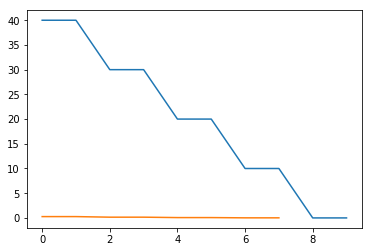

In [45]:
plt.plot(d)
plt.plot(sing/np.sum(sing))
plt.show()

NameError: name 'l' is not defined

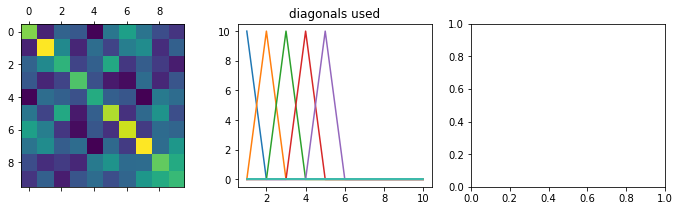

In [8]:
plt.figure(figsize=(16,3))
ax = plt.subplot(141)
ax.matshow(A)
ax2 = plt.subplot(142)
ax2.plot(range(1,len(np.diag(d))+1),np.diag(d))
plt.title('diagonals used')
ax3 = plt.subplot(143)
ax3.plot(range(1,len(l)+1),l)
plt.title('svd recovery')
ax4 = plt.subplot(144)
ax4.plot(range(1,len(sing)+1),sing)
plt.title('ZG sing recovery')
ax4.plot(elbows, sing[elbows-1], 'ro')
print(elbows)
plt.show()